# Answers

You can edit this Jupyter notebook to include your answers and run any code that generates those answers or produces plots.  You can add additional cells for code or markdown as needed.

This homework is primarily about running simulations involving initial value problems (IVPs) and understanding numerical differentiation.

In [1]:
import numpy as np

import scipy.integrate
from scipy.integrate._ivp.base import OdeSolver, DenseOutput
from scipy.integrate._ivp.base import check_arguments
from scipy.interpolate import interp1d
from scipy.integrate._ivp.common import (validate_max_step, validate_tol, select_initial_step,
                     norm, warn_extraneous, validate_first_step)
from scipy.integrate import odeint, solve_ivp

import scipy as sp
import sympy as sym
import matplotlib.pyplot as plt
import numbers
import scipy.integrate
from scipy.integrate import DenseOutput
from scipy.interpolate import interp1d
from euler import ForwardEuler
import sympy as sym
from sympy.solvers import ode
from scipy.sparse import csc_matrix
import scipy.sparse as sparse

## Problem 0 (25 points)

In this problem, you will play around with "Richardson extrapolation" - a handy trick which can often be used to combine several poor approximations to get a better one.

### Part A (5 points)

Write a function to approximate the integral of a function $f$ on an interval $[a,b]$ using a trapezoid rule with $N$ intervals. Your function should take in a user-prescribed function $f$, an interval (specified by the endpoints $a$ and $b$) and a number of intervals $N$ and output the approximate integral. The interval endpoints $a$ and $b$ as well as the number of intervals should be keyword arguments, and suitable checks should be done to make sure that any user-supplied values of these arguments are reasonable (i.e. your code will throw an error instead of crashing).

---

*Your answer here.  You can create some code cells as well*

In [2]:
def trapint(f,a = 0,b = 1,N = 100):
    '''
    This function returns the approximate integral of f in the interval [a,b] using the trapezoid rule with N intervals.
    the default interval is [0,1], N = 100.
    '''
    try:
        if type(a) != int and type(a) != float:
            print("a,b should be numbers, N should be a positive integer.")
            print("For default values ( [a,b] = [0,1], N = 100), the approximate integral is:")
            return trapint(f)
        if type(b) != int and type(b) != float:
            print("a,b should be numbers, N should be a positive integer.")
            print("For default values ( [a,b] = [0,1], N = 100), the approximate integral is:")
            return trapint(f)
        if type(N) != int or N<= 0:
            print("a,b should be numbers, N should be a positive integer.")
            print("For default values ( [a,b] = [0,1], N = 100), the approximate integral is:")
            return trapint(f)
        if a > b:
            print("I'm guessing you've typed the order of a and b in reverse. Here's the result with a<b.")
            [a,b] = [b,a]
        #first, test whether there are bad inputs, and a should be less than b.

        dx = (b-a)/N
        trapval = 0
        for i in range(N):
            trapval = trapval + (1/2)*(f(a+i*dx)+f(a+(i+1)*dx))*dx
        return trapval
    except TypeError:
        return('your first argument should be a function with domain on real numbers' )

In [47]:
trapint(2)

'your first argument should be a function with domain on real numbers'

### Part B (5 points)

Use your code to approximate the integral to $e^{x}$ on the interval $[0,1]$ for $N=2,4,8,\dots,2^{15}.$ Plot the error as a function of $N$ using a loglog plot and determine the best power $\alpha$ such that
$${\rm Error}(N) =  C/N^\alpha$$
for some fixed constant $C,$ as $N\to \infty.$ Note that it might be helpful to throw away the first few points.

----
Answer: The loglog error graph looks quadratic convergence, and indeed, when I tried many values of $\alpha$, the right power is $2$ (strictly speaking, $1.9999999$ is better asymptotically. But I guess that doesn't matter). As shown in the second plot below. In this case, $C\approx0.1432$.

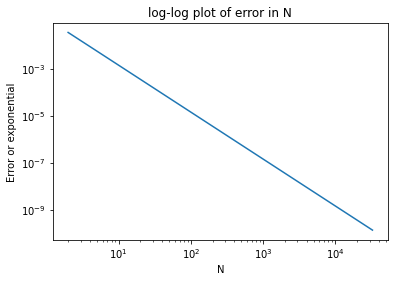

In [48]:
x_list = []
y_list = []
N_list = []
trap_list = []
#list for plotting.

for i in range(1,16):
    x_list.append(i)
    x = trapint(np.exp,0,1,2**(i))
    trap_list.append(x)
    N_list.append(2**(i))
    y_list.append(x+1-np.exp(1))
plt.loglog(N_list,y_list)
plt.xlabel("N")
plt.ylabel("Error or exponential")
plt.title("log-log plot of error in N")

plt.show()

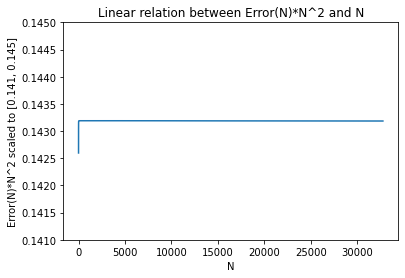

In [49]:
err_times_power = np.multiply(y_list,np.power(N_list, 2))
plt.plot(N_list, err_times_power)
plt.ylim(0.141, 0.145)
plt.xlabel("N")
plt.ylabel("Error(N)*N^2 scaled to [0.141, 0.145]")
plt.title("Linear relation between Error(N)*N^2 and N")

plt.show()

### Part C (5 points)

Round the $\alpha$ you found in Part B to the nearest integer, and call it $m.$ Assume that the output of your trapezoid integrator (call it $T(N)$) is given by the formula
$$T(N) =  \int_a^b \,f(x)\,{\rm d}x + C_0/N^m,$$
plus an error which is $o(N^{-m}).$
where the constant $C_0$ will depend on $a$ and $b$ and $f$ but not on $N.$ What happens to the error in $T(N)$ if you double $N$? Write an expression for it. Using your expressions for $T(N)$ and $T(2N)$ write an expression for the true integral. Do this analytically, not numerically. Hint: your answer should look like
$$ \int_a^b f(x)\,{\rm d}x \approx \alpha T(N) + \beta T(2N),$$
where $\alpha$ and $\beta$ are some constants which do not depend on $a,b,N,$ or $f.$ Check the accuracy of your approximation using the results in Part B. In particular, plot the error for $N=2,4,8,\dots,2^{14}.$ Note that you do not need to compute any new trapezoid approximations to do this!

---

As we've seen above, $m=2$.
Plugging in we have
$$T(N) =  \int_a^b \,f(x)\,{\rm d}x + \frac{C_0}{N^2}$$
and 
$$T(2N) =  \int_a^b \,f(x)\,{\rm d}x + \frac{C_0}{4N^2}$$
Thus, if we multiply the second equation by $4$ and subtract the first one we will get:
$$4T(2N)-T(N) = 3\int_a^b \,f(x)\,{\rm d}x$$
$$\Rightarrow \int_a^b \,f(x)\,{\rm d}x = \frac{4}{3}T(2N)-\frac{1}{3}T(N).$$

Now, in order to check how accurate this is, we use the output of trapezoid method from above, which is stored in y_list. So we check the difference of the above equation with the true value, $e-1$.

I did the result in semilogy plot, which is almost a straight line until very low digits when computational error occurs. This means the error decays like $e^{-cx}$.

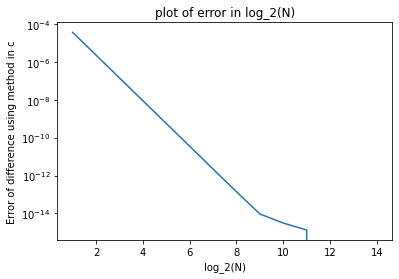

In [50]:
c_list = []
for i in range(len(y_list)-1):
    c_list.append((4*trap_list[i+1]-trap_list[i])/3+1-np.exp(1))

plt.semilogy(x_list[0:-1],c_list)
plt.xlabel("log_2(N)")
plt.ylabel("Error of difference using method in c")
plt.title("plot of error in log_2(N)")

plt.show()

### Part D (5 points)

Create a new integration function 'richardson_trap' which computes an approximation of the integral based on your answer to Part C. It should take in a function $f,$ an interval $[a,b]$ (i.e. the numbers $a$ and $b$), and an integer $N.$ It should call your trapezoid function twice for $N$ and $2 N$ and compute the approximation to the true integral using the $\alpha$ and $\beta$ you found in Part C. For $f(x) = \sin(x)$ on the interval $[-1,1],$ plot the error as a function of $N$ using a loglog plot and determine the best power $\alpha$ such that
$${\rm Error}(N) =  C/N^\alpha$$
for some fixed constant $C,$ as $N\to \infty.$ Note that it might be helpful to throw away the first few points.

---

As we can see below, the error is actually extremely small if we let $N = 20,\dots, 500$. Since $\sin$ is an odd function I didn't write the integration, as it is 0 anyway.

In [3]:
def richardson_trap(f,a=0,b=1,N=100):
    nt = trapint(f,a,b,N)
    ntt = trapint(f,a,b,2*N)
    itgr = (4*ntt-nt)/3
    return itgr

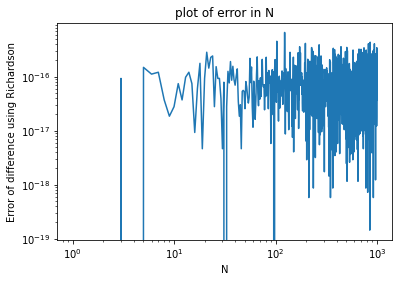

In [4]:
N_list = []
Error_list = []
for i in range(1,1000):
    N_list.append(i)
    Error_list.append(abs(richardson_trap(np.sin,-1,1,i)))
                      
plt.loglog(N_list,Error_list)
plt.xlabel("N")
plt.ylabel("Error of difference using Richardson")
plt.title("plot of error in N")

plt.show()

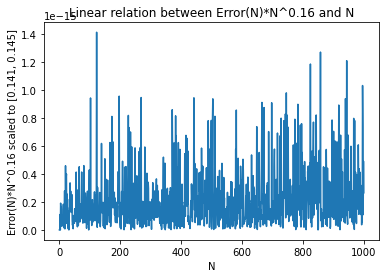

In [7]:
err_times_power2 = np.multiply(Error_list,np.power(N_list, 0.16))
plt.plot(N_list, err_times_power2)
plt.xlabel("N")
plt.ylabel("Error(N)*N^0.16 scaled to [0.141, 0.145]")
plt.title("Linear relation between Error(N)*N^0.16 and N")

plt.show()

### Part E (5 points)

Do the same sort of analysis to improve the forward difference approximation to the derivative. Here, the relevant parameter is $h$ instead of $N,$ and you want to think about using the results for $h$ and $h/2$ to get better approximations. Plot the error in the original finite difference as well as the error for your "Richardson-ized" finite difference for a range of $h$'s on a loglog plot. Make sure to explain any strange behavior you observe.

---

I first write up the base forward method function.

In [53]:
def forward_deri(f,x0 = 1,h = 0.01):
    '''
    This function returns the approximate derivative of f at x0 using the forward method with h step-size.
    the default approximation point is x0=1, h = 0.01.
    '''
    try:
        if type(x0) != int and type(x0) != float:
            print("x0 should be a number, h should be a positive number.")
            print("For default values ( x0 = 1, h = 0.01), the approximate integral is:")
            return forward_deri(f)
        if  h<= 0:
            print("x0 should be a number, h should be a positive number.")
            print("For default values ( x0 = 1, h = 0.01), the approximate integral is:")
            return forward_deri(f)
        #first, test whether there are bad inputs.

        return (f(x0+h)-f(x0))/h
    except TypeError:
        return('your first argument should be a function with domain on real numbers' )

Now, I use $e^x$ to compute the error. It is convenient since the derivative exists everywhere. Also, I choose $x_0=1$ so the derivative should be $e$.

As we can see, the loglog plot is linear, and the new $m$ we find is $-1$. This means that the below condition holds numerically:


$${\rm Error}(h) =  Ch$$


where $C \approx 1.359$

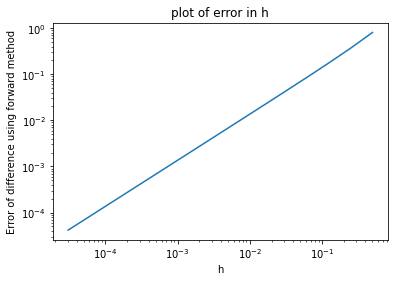

In [54]:
h_list = []
E_list = []
fwd_list = []
for i in range(1,16):
    h_list.append(1/(2**i))
    fwd_list.append(forward_deri(np.exp,1,1/(2**i)))
    E_list.append(forward_deri(np.exp,1,1/(2**i))-np.exp(1))
plt.loglog(h_list, E_list)
plt.xlabel("h")
plt.ylabel("Error of difference using forward method")
plt.title("plot of error in h")

plt.show()

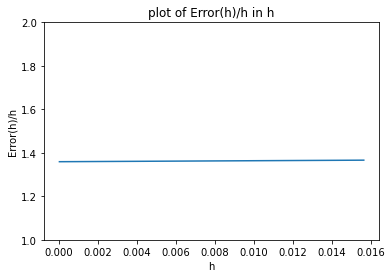

In [55]:
err_times_power = np.multiply(E_list,np.power(h_list, -1))
plt.plot(h_list[5:], err_times_power[5:])
plt.xlabel("h")
plt.ylabel("Error(h)/h")
plt.title("plot of Error(h)/h in h")
plt.ylim(1, 2)


plt.show()

As we've seen above, $m=-1$.
Plugging in we have
$$F(h) =  f'(x_0) + c_0 h$$
and 
$$F(\frac{1}{2}h) =  f'(x_0) + \frac{1}{2}c_0 h$$
Thus, if we multiply the second equation by $2$ and subtract the first one we will get:
$$f'(x_0) = 2T(2N)-T(N).$$

Now, in order to check how accurate this is, we use the output of forward method from above, which is stored in E_list. So we check the difference of the above equation with the true value, $e$.

I did the result in loglog plot. Now, the log-log plot is linear, meaning that the error decays linearly as h, wich slope $e^c$.

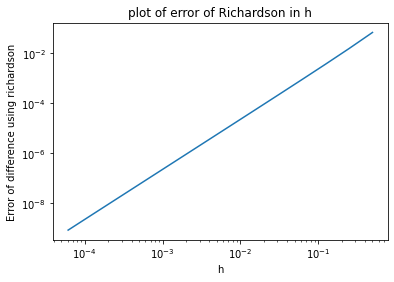

In [56]:
f_list = []
for i in range(len(E_list)-1):
    f_list.append(abs(2*fwd_list[i+1]-fwd_list[i]-np.exp(1)))

plt.loglog(h_list[0:-1],f_list)
plt.xlabel("h")
plt.ylabel("Error of difference using richardson")
plt.title("plot of error of Richardson in h")

plt.show()

### Part F (optional challenge)

Do the same analysis you did in Part C for 'richardson_trap' and determine the new $\alpha$ and $\beta$ values. What happens if instead of doubling you multiply $N$ by $3/2$ each time? What would you do if you had $T(N),$ $T(2N),$ and $T(3N)$?

#### Solution:
Using the $\displaystyle\frac{3}{2}$ step we have
$$T(N) =  \int_a^b \,f(x)\,{\rm d}x + \frac{C_0}{N^2}$$
and 
$$T\left(\frac{3}{2}N\right) =  \int_a^b \,f(x)\,{\rm d}x + \frac{4C_0}{9N^2}$$
Thus, if we multiply the second equation by $\displaystyle\frac{9}{4}$ and subtract the first one we will get:
$$\frac{9}{4}T\left(\frac{3}{2}N\right)-T(N) = \frac{5}{4}\int_a^b \,f(x)\,{\rm d}x$$
$$\Rightarrow \int_a^b \,f(x)\,{\rm d}x = \frac{9}{5}T(2N)-\frac{4}{5}T(N).$$

So the new pair of $\displaystyle(\alpha,\beta) = \left(-\frac{4}{5},\frac{9}{5}\right)$.

If we use $3$ values, the system of equations becomes:
$$T(N) =  \int_a^b \,f(x)\,{\rm d}x + \frac{C_0}{N^2}$$

$$T(2N) =  \int_a^b \,f(x)\,{\rm d}x + \frac{C_0}{4N^2}$$

$$T(3N) =  \int_a^b \,f(x)\,{\rm d}x + \frac{C_0}{9N^2}$$

The thing is that we have $3$ degrees of freedom where as we only need $2$. So we could do some optimization here. Anyway we first solve it and get:
$$ \int_a^b \,f(x)\,{\rm d}x = \frac{4}{3}T(2N)-\frac{1}{3}T(N) = \frac{9}{8}T(3N)-\frac{1}{8}T(N).$$

So we can choose our new pair $\displaystyle(\alpha,\beta,\gamma) = \left(a,b,\frac{32b-11a}{27}\right)$.

## Problem 1 (30 points)

In this problem, you will implement a custom ODE solver for `solve_ivp` based on the Forward Euler method, and implement some basic tests.

### Part A (20 points)
If you read the [documentation for `solve_ipv`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.solve_ivp.html), which we used in class, you'll see that you can write your own solver.

Write a solver for the forward Euler method, which is not implemented as one of the available solvers (while simple, it typically is not very accurate).  Recall, this is the basic rule:
\begin{equation}
y(t + h) = y(t) + h f(t, y)
\end{equation}

Your solver should be a class which is derived from [`scipy.integrate.OdeSolver`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.OdeSolver.html#scipy.integrate.OdeSolver)
```python
class ForwardEuler(scipy.integrate.OdeSolver):
    pass
```

Your class definition should go in [`euler.py`](euler.py)

You should read the documentation for this base class in order to implement `ForwardEuler`.  Here are some hints/notes:
* Allow a user to set `h` using a keyword argument.  This can be passed using `solve_ivp(..., method=ForwardEuler, h=0.01)` to set `h=0.01`
* Use a default step size `h = (t_bound - t0) / 100`
* private methods begin with an underscore "_"
* the method `_dense_output_impl(self)` should output a `ForwardEulerOutput` (defined in [`euler.py`](euler.py))
* direction should be `+1`
* You won't use a Jacobian, so `njev` and `nlu` can remain at 0.
* You may want to consider using `super(ForwardEuler, self).__init__`
* You may want to read the source code for the parent class [here](https://github.com/scipy/scipy/blob/v1.5.3/scipy/integrate/_ivp/base.py#L25-L214)

---
### I used the original scipy.integrate._ivp.rk as template and wrote the following. 

The reference is the source code:
https://github.com/scipy/scipy/blob/v1.5.3/scipy/integrate/_ivp/rk.py

The implementation is in euler.py

### Part B (10 points)

Use your `ForwardEuler` solver and `solve_ivp` to solve an IVP $y'(t) = y$ with $y(0) = 1$ on the domain $t\in [0,5]$, using a step size `h=0.01`.  Make a plot of the solution to this IVP with axes labeled `y` and `x`.

Use SymPy to obtain the ground-truth solution to this IVP.  What is the largest error you see on the domain you solved the problem?  Try solving with the default solver in `solve_ivp`.  What is the largest error in this case?

---

The largest error of my method is around 4, where as the largest error of solve_ivp is 0.6.

In [57]:
def yyy(t,y):
    return y
A = ForwardEuler(yyy,1,0,5,0.01, bool)
h = A.dense_output() #Use dense_output to return a interp1d function

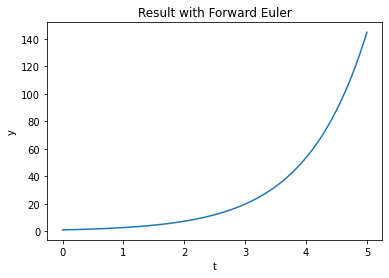

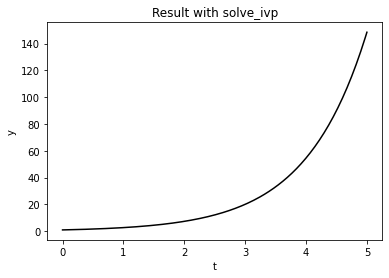

In [58]:
xnew = np.linspace(0,5, 200)
ynew = h(xnew)   # use interpolation function returned by `interp1d`
plt.plot(xnew, ynew, '-')
plt.title("Result with Forward Euler")
plt.ylabel("y")
plt.xlabel("t")
plt.show()

t_span = (0.0, 5.0)
t_eval = np.linspace(0,5, 200)
sol = solve_ivp(yyy, t_span, [1],t_eval=t_eval)
plt.plot(sol.t, sol.y[0], c='k')
plt.title("Result with solve_ivp")
plt.ylabel("y")
plt.xlabel("t")
plt.show()

In [59]:
t = sym.symbols('t') # symbol
y = sym.Function('y') # symbolic function
eqn = y(t).diff(t) - y(t) # eqn = 0
eqn
ode.dsolve(eqn, hint='separable') # we solve the differential equation using the hinted method

Eq(y(t), C1*exp(t))

Thus, by plugging in $y(0) = 1$ we get $C_1 = 1$. And the solution is just $y = e^t$.

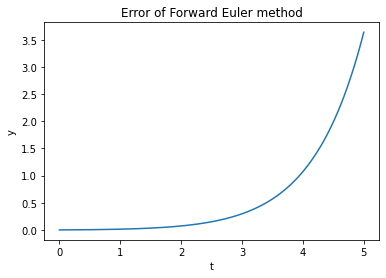

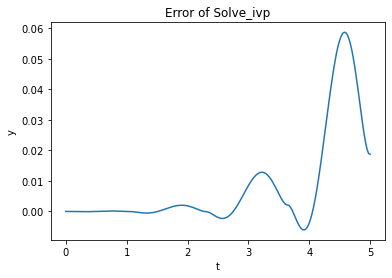

In [60]:
tt = np.linspace(0,5,200)
symexp = sym.exp(t)
g = sym.lambdify(t, symexp, 'numpy')
gg = g(np.array(tt))
plt.plot(tt, gg-ynew)
plt.title("Error of Forward Euler method")
plt.ylabel("y")
plt.xlabel("t")
plt.show()
plt.plot(tt, gg-sol.y[0])
plt.title("Error of Solve_ivp")
plt.ylabel("y")
plt.xlabel("t")
plt.show()

### Part C (optional challenge)

Use Richardson (see Problem 0) on your Forward Euler solver. How does the error change? You can assume that $m=1$ and derive the formula analytically. What happens if you do Richardson twice?

It's not hard to notice that since $\displaystyle N\sim \frac{1}{h}$, we use the model $E = Ch$.

Assume that the function is $F$, and the true value of the solution is $S$, then we have:
$$\begin{cases}
F\left(h\right) = S +Ch\\
F\left(\frac{1}{2}h\right) = S +\frac{1}{2}C h
\end{cases}
$$
which yields
$$S = 2F\left(\frac{1}{2}h \right)-F(h).$$

Now for the second order Richardson we let $\displaystyle G(h) = 2F\left(\frac{1}{2}h \right)-F(h)$ and assume that the error of $G$ has that 
$$EG = C'h^{\alpha}.$$

Very well, we now have for real value $SS$,
$$\begin{cases}
G\left(h\right) = S +Ch^{\alpha}\\
G\left(\frac{1}{2}h\right) = S +\left(\frac{1}{2}\right)^{\alpha}C h^{\alpha}
\end{cases}
$$
and therefore
$$2^{\alpha}G\left(\frac{1}{2}h\right)-G(h) = (2^\alpha -1)S$$

$$\Rightarrow \frac{2^\alpha}{2^\alpha-1}G\left(\frac{1}{2}h\right) - \frac{1}{2^\alpha-1}G(h) = S$$

$$\Rightarrow S = \frac{2^{\alpha+1}}{2^\alpha-1}F\left(\frac{1}{4}h\right)-\frac{2^{\alpha}+2}{2^\alpha-1}F\left(\frac{1}{2}h\right)+\frac{1}{2^\alpha-1}F(h). $$

## Problem 2 (20 points)

Now that you're warmed up, here are some more simulations.

### Part A (15 points)

In this problem, we'll simulate a planet and moon moving in a 2-dimensional plane.

Newton's law of gravity says that $F_g = Gm_1 m_2 / \|r\|^2$.  The direction of the force is in the direction of the vector $r$.  Let $x(t)$ dentote the position of the planet and $y(t)$ denote the position of the moon, and $r(t) = x(t) - y(t)$ Then
\begin{equation}
x''(t) = -F_g / m_1 \times r / \|r\|\\
y''(t) = F_g / m_2 \times r / \|r\|
\end{equation}
$x$ and $y$ are 2-vectors, so this is a system of 4-second order ODEs.  We can use the following trick to write this as 8 first order ODEs. Let $p(t)$ be the velocity of the planet and $q(t)$ be the velocity of the moon (note that they are vector valued!). So, $p(t) = x'(t)$, and $q(t) = y'(t)$.  Here are the terms for $x$:
\begin{equation}
p_1'(t) = -F_g / m_1 \times r_1(t) / \|r\|\\
p_2'(t) = -F_g / m_1 \times r_2(t) / \|r\|\\
x_1'(t) = p_1(t)\\
x_2'(t) = p_2(t)
\end{equation}

We'll model the Earth and moon.  The [Gravitational constant](https://en.wikipedia.org/wiki/Gravitational_constant) has value `G=6.67 e-11` (we're dropping units, which are all SI).  The mass of the earth is `m1 = 5.972 e24`, and the mass of the moon is `m2=0.07346 e24`.  The distance from the moon to the earth is `r = 384.4 e6`.  This means the orbital speed of the moon around the earth is about `1.022 e3`.

Use `solve_ivp` to run a simulation of the moon orbiting the earth for `5 e6` seconds (about 2 months).  Use initial conditions $x(0) = 0, p(0) = 0$ for the earth, and $y(0) = (0, 384.4 \times 10^6)$ and $q(0) = (1.022 \times 10^3, 0)$

Plot $x_1(t), x_2(t)$ and $y_1(t), y_2(t)$ in the same plane with different colors (include a legend and title).

---

*Put any answers/discussion here*

In [61]:
G=6.67e-11
m1 = 5.972e24
m2=0.07346e24
r = 384.4e6
Fg = G*m1*m2/(r**2)
def systemode(t,z):
    '''
    The vector z = [x1,x2,p1,p2,y1,y2,q1,q2]
    and for the outputs, it is really the derivative of z.
    
    '''
    x1 = z[2]
    x2 = z[3]
    p1 = -Fg*(z[0]-z[4])/(r*m1)
    p2 = -Fg*(z[1]-z[5])/(r*m1)
    y1 = z[6]
    y2 = z[7]
    q1 = Fg*(z[0]-z[4])/(r*m2)
    q2 = Fg*(z[1]-z[5])/(r*m2)
    return x1,x2,p1,p2,y1,y2,q1,q2

In [62]:
t_span = (0, 5e6)
t_eval = np.linspace(0,5e6, 200)
sol = solve_ivp(systemode, t_span,[0,0,0,0,0,384.4e6,1.022e3,0],t_eval = t_eval)

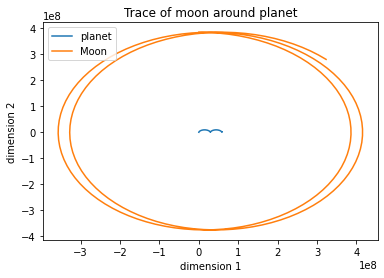

In [63]:
fig, ax = plt.subplots()
ax.plot(sol.y[0], sol.y[1], label='planet')
ax.plot(sol.y[4], sol.y[5], label='Moon')
legend = ax.legend()
plt.title("Trace of moon around planet")
plt.ylabel("dimension 2")
plt.xlabel("dimension 1")
plt.show()

### Part B (5 points)

Now simulate a system with 10 planets, in 10 random locations. The planets should have random masses chosen independently and uniformly from the interval $[0,6 \times 10^{24}]$ and initial locations chosen randomly from the $(8 \times 10^8) \times (8\times 10^8)$ square centered at the origin. The components of each planet's initial velocity should be chosen randomly on $[-5\times 10^{2}, 5 \times 10^{2}].$ Plot the positions of each planet as a function of time.

---

It's obvious that for this kind of problem we should use a sparce matrix to write up the ode function, which is what we'll do. 

I'll use the initial condition in the order of $$[p_{1,1},p_{1,2},p_{2,1},p_{2,2},\dots,p_{10,1},p_{10,2},x_{1,1},x_{1,2},x_{2,1},x_{2,2},\dots,x_{10,1},x_{10,2}]^T$$
The good thing about doing things this way is that we get diagonal blocks as 0 and left bottom block as identity as 0. So we really only need to worry about the right top block.

In [22]:
# We start by defining the mass, location, and velocity of the planets.
m = 6e24*np.random.rand(10)
dim1 = 16e8*(np.random.rand(10)-0.5)
dim2 = 16e8*(np.random.rand(10)-0.5)
vel1 = 10e2*(np.random.rand(10)-0.5)
vel2 = 10e2*(np.random.rand(10)-0.5)

In [23]:
G=6.67e-11
# Fg = G*m1*m2/(r**2)

#create needed parameters
Fg = np.empty([10, 10])
dist = np.empty([10, 10])
for i in range(10):
    for j in range(10):
        if j == i:
            Fg[i,j] = 0
            dist[i,j] = 0
        else:
            dist_vec = np.subtract([dim1[i],dim2[i]],[dim1[j],dim2[j]])
            dist[i,j] = np.linalg.norm(dist_vec)
            Fg[i,j] = G*m[i]*m[j]/(dist[i,j]*dist[i,j])


In [24]:
# We now create the matrix for the linear system.
data = []
row = []
col = []
for i in range(20,40):
    for j in range(20):
        if i-j == 20:
            row.append(i)
            col.append(j)
            data.append(1)
for i in range(20):
    for j in range(20,40):
        real_i = (i+2)//2 #this is saying which planet
        pos_i = i-2*real_i+3 #this is saying which dimension
        m_base = m[real_i-1]
        if (i+j) % 2 == 0:
            if (j-20) == i:
                row.append(i)
                col.append(j)
                s = 0
                for k in range(10):
                    # loop in Fg and dist matrix
                    if k != real_i-1:
                        Fg1 = Fg[real_i-1,k]
                        r1 = dist[real_i-1,k]
                        term = Fg1/(r1*m_base)
                        s += term
                data.append(-s)
            else:
                real_j = (j-18)//2
                pos_j = j-20-2*real_j+3
                row.append(i)
                col.append(j)
                Fg1 = Fg[real_i-1,real_j-1]
                r1 = dist[real_i-1,real_j-1]
                term = Fg1/(r1*m_base)
                data.append(term)

In [25]:
rrow = np.array(row)
ccol = np.array(col)
ddata = np.array(data)

In [26]:
A = csc_matrix((ddata, (rrow, ccol)),
                          shape = (40,40))
#B = A.toarray()

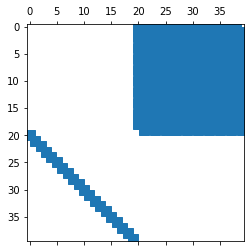

In [27]:
plt.spy(A)

In [28]:
def tenstar(t,z):
    '''
    The vector z = [p_{1,1},p{1,2},...,p_{10,1},p_{10,2}, x_{1,1},x{1,2},...,x_{10,1},x_{10,2}]
    and for the outputs, it is really the derivative of z.
    
    '''
    zp = A @ z
    return zp

In [29]:
t_span = (0, 5e6)
t_eval = np.linspace(0,5e6, 200)
# create initial condition
initial = []
for i in range(10):
    initial.append(vel1[i])
    initial.append(vel2[i])
for i in range(10):
    initial.append(dim1[i])
    initial.append(dim2[i])
sol = solve_ivp(tenstar, t_span, initial,t_eval = t_eval)

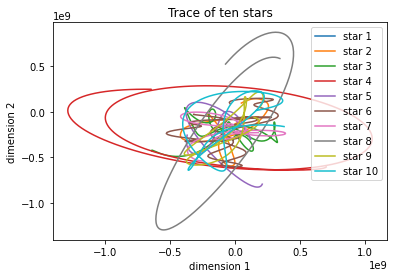

In [30]:
fig, ax = plt.subplots()
for i in range(10):
    ax.plot(sol.y[20+2*i-2], sol.y[20+2*i-1], label='star {}'.format(i+1))

legend = ax.legend()
plt.title("Trace of ten stars")
plt.ylabel("dimension 2")
plt.xlabel("dimension 1")
plt.show()

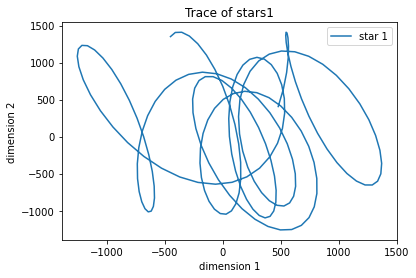

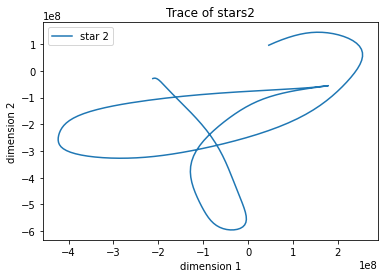

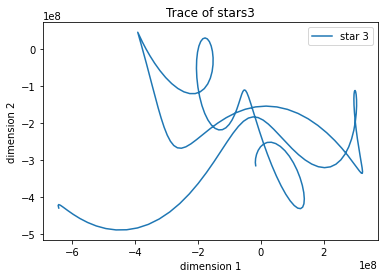

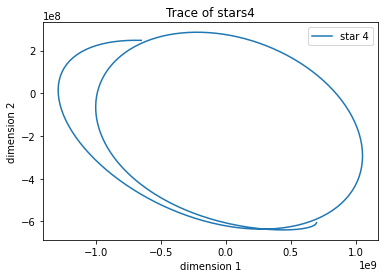

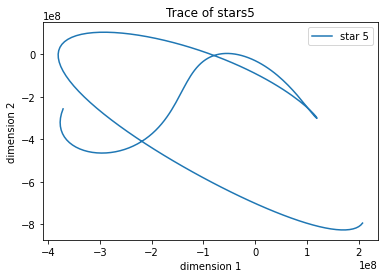

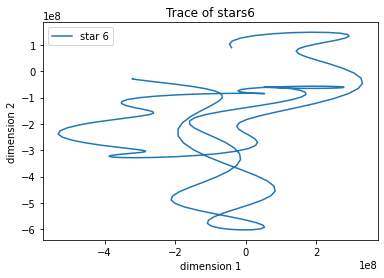

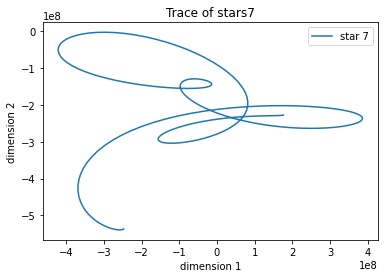

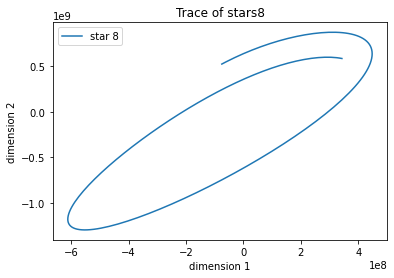

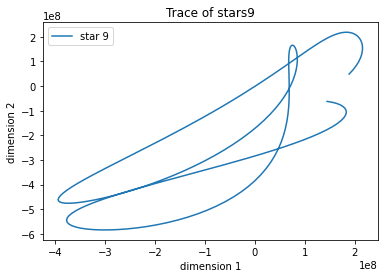

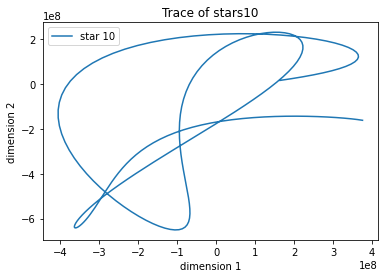

In [31]:
for i in range(10):
    plt.plot(sol.y[20+2*i-2], sol.y[20+2*i-1], label='star {}'.format(i+1))
    legend = plt.legend()
    plt.title("Trace of stars{}".format(i+1))
    plt.ylabel("dimension 2")
    plt.xlabel("dimension 1")
    plt.show()

## Problem 3 (10 points)

Use functionality from `scipy.sparse` to help illustrate your answers to the following questions.

In the [class materials on differentiation](https://caam37830.github.io/book/04_functions/differentiation.html), we defined `forward_diff_matrix` and `backward_diff_matrix`.  What vectors characterize the nullspace of each of these matrices (i.e. vectors `x` so that `D @ x = 0`)?

Give an interpretation (from calculus) of the vector `y` where `y` solves the linear system `D @ y = x`, where `D` is a finite-difference matrix.  What is the implication of the nullspace of `D` on solving this linear system?

Create a finite difference operator for the Laplacian $\Delta = \partial_x^2 + \partial_y^2$ where second-order differences are based on the stencil `[1, -2, 1]`.  What is the nullspace of this matrix?

---


By the definition of the `forward_diff_matrix` $D_f$ and the `backward_diff_matrix` $D_b$ are:
$$D_f = \frac{1}{h}\left(\begin{array}{cccccc}
     -1&1&&&&  \\
     & -1&1&&& \\
     && \ddots &\ddots &&\\
     &&&-1 & 1 & \\
     &&&&-1 & 1\\
     &&&&&0
\end{array}\right)_{n\times n}\;\;\text{and}\;\;
D_b = \frac{1}{h}\left(\begin{array}{cccccc}
     1&&&&&  \\
     -1& 1&&&& \\
     &\ddots & \ddots &&&\\
     &&-1&1 & & \\
     &&&-1&1 & \\
     &&&&-1&0
\end{array}\right)_{n\times n}$$

Since they both have rank $= n-1$ and dimension $n$, the dimension of their kernel is $1$. That means we only need to find one nonzero vector in the kernel for each matrix. 

But this is easy. For $D_f$ simply choose $x = (1,\dots,1)^T$ then we are done since each row of $D_fx$ is $1-1=0$ expect the last, which is $0$ anyway. So its kernel is $\{cx|x = (1,\dots,1)^T,c\in \mathbb{R}\}$.

For $D_b$ choose $x = (0,\dots, 0,1)^T$, then $D_bx =0$. So its kernel is $\{cx|x = (0,\dots, 0,1)^T,c\in \mathbb{R}\}$.

If $Dy = x$, then it just says that if $x$ is the derivative of $f$ at n consequent points, then $y$ is the value of $f$ at those points. This could be used to calculate one branch of the indefinite integral.

If $y\in$ ker($D$), then it means that $f$ is flat on the interval chosen.

In [74]:
def diff_matrix(n):
    """
    Create a matrix that acts as a finite difference derivative on vector of length n
    """
    data = []
    i = []
    j = []

    # forward difference
    i.append(0)
    j.append(0)
    data.append(-1)

    i.append(0)
    j.append(1)
    data.append(1)

    # central differences in interior
    for k in range(1, n - 1):
        i.append(k)
        j.append(k-1)
        data.append(-1)

        i.append(k)
        j.append(k+1)
        data.append(1)

    # backward difference
    i.append(n-1)
    j.append(n-1)
    data.append(1)

    i.append(n-1)
    j.append(n-2)
    data.append(-1)
    
    return sparse.coo_matrix((data, (i,j)), shape=(n, n)).tocsr()

In [75]:
n = 100
# for the input of dimension of D, we should input n = len(g(x)). Here we just choose 100 and 100^3  = 1,000,000 = 1000^2.

# create Dxx

D = diff_matrix(n)
DD = D @ D
Dxx = sparse.kron(sparse.eye(n), DD).tocsr()

# create Dyy

Dyy = sparse.kron(DD, sparse.eye(n)).tocsr()

Laplace = Dxx+Dyy

In [76]:
type(Laplace)

scipy.sparse.csr.csr_matrix

Now we use $g = \sin x+\cos x$ to test.

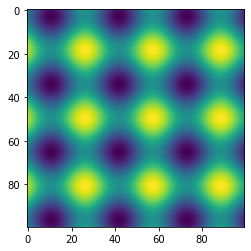

In [77]:
xx, yy = np.meshgrid(np.linspace(-10,10,100), np.linspace(-10,10,100))
g2d = np.sin(xx) + np.cos(yy)
plt.imshow(g2d)
plt.show()

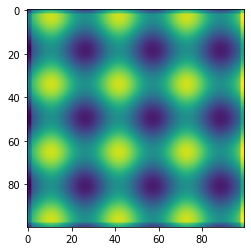

In [78]:
g = g2d.flatten()
g_laplace = Laplace @ g
plt.imshow(g_laplace.reshape(100,100))
plt.show()

So indeed, since $g'' = -g$ for our choice of $g$, the graph says the same.

The null space of the function is just the harmonic subspace.

## Feedback

If you would like share how long it took you to complete this assignment, it will help adjust the difficulty for future assignments.  You're welcome to share additional feedback as well.

Very long. It took around two full days.